# In Depth: Linear Regression

Just like naive bayes classifier is the good starting point for doing a classification. Linear regression is also a good starting point for doing regression process. Fit very quickly and very interpretable.

__Import libraries__

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

---

## Simple Linear Regression

Start by considering the straight-line fit to data, y = ax + b, where a is the slope and b as the intercept.

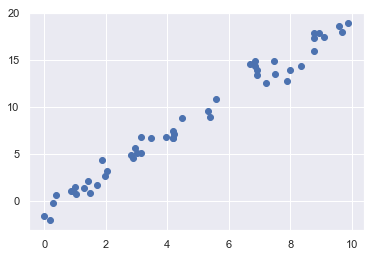

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

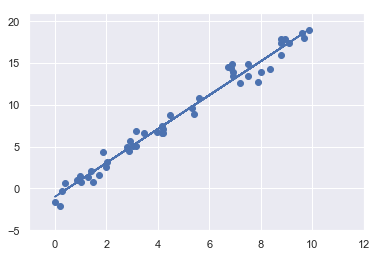

In [3]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]

model = LinearRegression().fit(X, y)
yfit = model.predict(X)

plt.scatter(X, y)
plt.plot(X, yfit)
plt.axis([-1, 12, -5, 21]);

In [4]:
# The slope and intercept value
print("Model slope     : ", model.coef_[0])
print("Model intercept : ", model.intercept_)

Model slope     :  2.0272088103606953
Model intercept :  -0.9985770855532046


Also works on multidimensional linear models of the form: <br>
$y = a_{0} + a_{1}x_{1} + a_{2}x_{2} + ...$

In [5]:
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.49999999999999645
[ 1.5 -2.   1. ]


---

## Basis Function Regression

The idea is turn this: $y = a_{0} + a_{1}x_{1} + a_{2}x_{2} + ...$ <br> 
into, for example if $f_{n}(x) = x^{n}$, our model becomes polynomial regression: $y = a_{0} + a_{1}x + a_{2}x^{2} + ...$ <br>
We done this by taking one-dimensional x values and projected it into a higher dimension.

### Polynomial basis function

In [6]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit_transform(x[:, np.newaxis]) # fit and transform our one-dimesional array x to 3-dimensional array

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [9]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                          LinearRegression())

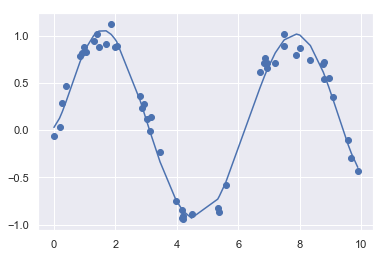

In [115]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(x[:, np.newaxis])
con = np.stack((x, yfit), axis=-1)
df = pd.DataFrame(con)
df = df.sort_values(by=[0])

plt.scatter(x, y)
plt.plot(df[0].values, df[1].values);

### Gaussian basis functions

A gaussian basis function fit to nonlinear data:
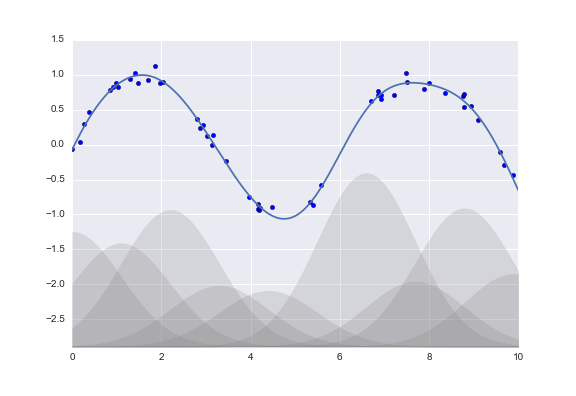